## Link Dataset
https://drive.google.com/file/d/15rFZ4WnlJkSfOnJ7ZaOxWdJuTK1-yGKF/view?usp=sharing

## Mengimport Library dan Membaca Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Cek nilai null

In [2]:
# Memeriksa nilai null di setiap kolom
null_counts = df.isnull().sum()

# Menampilkan jumlah nilai null di setiap kolom
print(null_counts)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


## Data cleaning pada atribut Height, Weight, dan Age dengan Median

In [3]:
from sklearn.impute import SimpleImputer

# Inisialisasi SimpleImputer dengan strategi median
imputer = SimpleImputer(strategy='median')

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[['Age', 'Height', 'Weight']] = imputer.fit_transform(df[['Age', 'Height', 'Weight']])


## Data cleaning pada target

In [4]:
df['Medal'].fillna('None', inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [5]:
# Memeriksa nilai null di setiap kolom
null_counts = df.isnull().sum()

# Menampilkan jumlah nilai null di setiap kolom
print(null_counts)

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


## Standarisasi pada Age, Height, dan Weight 

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])

## Label Ecoding pada Medal

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Medal_encoded'] = le.fit_transform(df['Medal'])

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_encoded
0,1,A Dijiang,M,-0.238971,0.510420,0.752137,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,2
1,2,A Lamusi,M,-0.398020,-0.567265,-0.837921,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,2
2,3,Gunnar Nielsen Aaby,M,-0.238971,-0.028423,-0.042892,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,2
3,4,Edgar Lindenau Aabye,M,1.351524,-0.028423,-0.042892,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,-0.716119,1.049262,0.911143,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,2


## Membagi data jadi train set dan test set

In [8]:
from sklearn.model_selection import train_test_split

# Pisahkan variabel independen (X) dan dependen (y)
X = df[['Age', 'Height', 'Weight']]
y = df['Medal_encoded']

# Bagi dataset menjadi training set dan testing set (misalnya, 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Periksa ukuran dari masing-masing set
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Jumlah data training: 189781
Jumlah data testing: 81335


## Sequential Model
Buat arsitektur DNN

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Inisialisasi model Sequential
model = Sequential()

# Tambahkan lapisan input dengan 3 node (sesuai dengan jumlah fitur: Age, Height, Weight)
model.add(Dense(3, input_dim=3, activation='relu'))

# Tambahkan lapisan tersembunyi dengan 64 node dan fungsi aktivasi relu
model.add(Dense(64, activation='relu'))

# Tambahkan lapisan output dengan 4 node (sesuai dengan jumlah kelas Medal)
model.add(Dense(4, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5841 - accuracy: 0.8530 - val_loss: 0.5751 - val_accuracy: 0.8533
Epoch 2/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5752 - accuracy: 0.8532 - val_loss: 0.5750 - val_accuracy: 0.8533
Epoch 3/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5748 - accuracy: 0.8532 - val_loss: 0.5734 - val_accuracy: 0.8533
Epoch 4/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5746 - accuracy: 0.8532 - val_loss: 0.5739 - val_accuracy: 0.8533
Epoch 5/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5745 - accuracy: 0.8532 - val_loss: 0.5732 - val_accuracy: 0.8533
Epoch 6/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5745 - accuracy: 0.8532 - val_loss: 0.5737 - val_accuracy: 0.8533
Epoch 7/10
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5743 - accuracy: 0.8532 - val_loss: 0.5767 - val_ac

## Evaluasi Model

In [11]:
# Evaluasi model terhadap data test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Tampilkan hasil evaluasi
print(f'Loss pada data test: {test_loss:.4f}')
print(f'Akurasi pada data test: {test_accuracy*100:.2f}%')

Loss pada data test: 0.5738
Akurasi pada data test: 85.33%


## Grafik pergerakan Metrik

Epoch 1/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5741 - accuracy: 0.8532 - val_loss: 0.5743 - val_accuracy: 0.8533
Epoch 2/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5741 - accuracy: 0.8532 - val_loss: 0.5731 - val_accuracy: 0.8533
Epoch 3/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5740 - accuracy: 0.8532 - val_loss: 0.5729 - val_accuracy: 0.8533
Epoch 4/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5741 - accuracy: 0.8532 - val_loss: 0.5735 - val_accuracy: 0.8533
Epoch 5/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5740 - accuracy: 0.8532 - val_loss: 0.5731 - val_accuracy: 0.8533
Epoch 6/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5740 - accuracy: 0.8532 - val_loss: 0.5730 - val_accuracy: 0.8533
Epoch 7/10
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5739 - accuracy: 0.8532 - val_loss: 0.5731 - val_ac

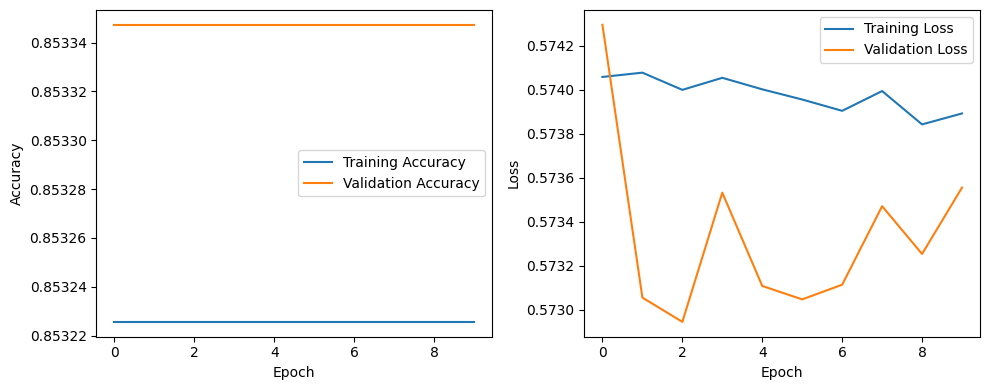

In [12]:
import matplotlib.pyplot as plt

# Lakukan pelatihan model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Dapatkan metrik pelatihan dan validasi dari riwayat
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting metrik akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting metrik loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


## Mengatasi Overfitting

Penyederhanaan Model

In [13]:
# Kurangi jumlah node pada lapisan tersembunyi
model.add(Dense(32, activation='relu'))

lakukan Regularisasi

In [14]:
from keras import regularizers

# Tambahkan regularisasi L2 pada lapisan tersembunyi
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

lakukan Dropout

In [15]:
from keras.layers import Dropout

# Tambahkan dropout layer setelah lapisan tersembunyi
model.add(Dropout(0.5))

Validasi Silang

In [16]:
from sklearn.model_selection import KFold

# Lakukan validasi silang
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # ... (lakukan pelatihan pada setiap lipatan)


lakukan early Stopping

In [17]:
from keras.callbacks import EarlyStopping

# Atur callback early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Latih model dengan early stopping
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5739 - accuracy: 0.8532 - val_loss: 0.5732 - val_accuracy: 0.8533
Epoch 2/50
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5739 - accuracy: 0.8532 - val_loss: 0.5732 - val_accuracy: 0.8533
Epoch 3/50
5931/5931 [==============================] - 11s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5733 - val_accuracy: 0.8533
Epoch 4/50
5931/5931 [==============================] - 13s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5729 - val_accuracy: 0.8533
Epoch 5/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5739 - accuracy: 0.8532 - val_loss: 0.5729 - val_accuracy: 0.8533
Epoch 6/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5739 - accuracy: 0.8532 - val_loss: 0.5734 - val_accuracy: 0.8533
Epoch 7/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5729 - val_ac

## Tampilkan Grafik

Epoch 1/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5730 - val_accuracy: 0.8533
Epoch 2/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5731 - val_accuracy: 0.8533
Epoch 3/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5738 - accuracy: 0.8532 - val_loss: 0.5731 - val_accuracy: 0.8533
Epoch 4/50
5931/5931 [==============================] - 12s 2ms/step - loss: 0.5737 - accuracy: 0.8532 - val_loss: 0.5733 - val_accuracy: 0.8533


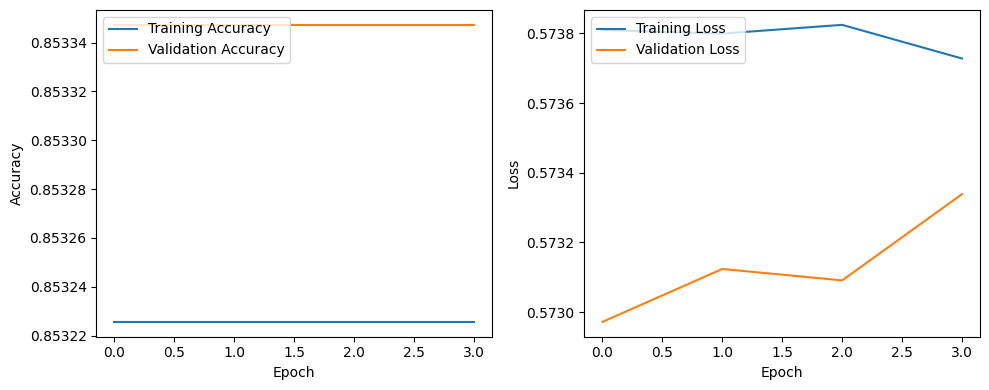

In [19]:
import matplotlib.pyplot as plt

# Lakukan pelatihan model dengan strategi pengurangan overfitting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Dapatkan metrik pelatihan dan validasi dari riwayat
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting metrik akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting metrik loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Tampilkan plot
plt.tight_layout()
plt.show()
